In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
library(cowplot)

In [3]:
source("/nfs/research/irene/ysong/MY_BIN/ggplot_themes.r")


Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [4]:
library(patchwork)
library(ggsci)


Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots




In [5]:
pal_npg("nrc")(8)

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF"

In [6]:
color_pal = c( pal_npg("nrc")(8), "#F4D714")
color_pal

[1] "#E64B35FF" "#4DBBD5FF" "#00A087FF" "#3C5488FF" "#F39B7FFF" "#8491B4FF"
[7] "#91D1C2FF" "#DC0000FF" "#F4D714"

## batch in all tasks

In [14]:
heart_batch = read_csv("heart_hs_mf_mm_batch_ranked.csv")
hippo_batch = read_csv("hippocampus_hs_ma_su_batch_ranked.csv")
panc_batch = read_csv("pancreas_hs_mm_batch_ranked.csv")
embryo_batch = read_csv("embryo_dr_xt_batch_ranked.csv")

Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scale...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, graph_conn_scaled, pcr_scaled, silhouette_batch_scale...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): type, homology_method, integration_method
dbl (9): iLISI_scaled, gra

In [15]:
head(panc_batch)

iLISI_scaled,graph_conn_scaled,pcr_scaled,silhouette_batch_scaled,avg_score,type,homology_method,integration_method,iLISI_scaled_rank,graph_conn_scaled_rank,pcr_scaled_rank,silhouette_batch_scaled_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,0.8547985,0.9573295,0.6917903,0.8759796,scVI stronger homology,stronger homology,scVI,1,10,2,5
0.9063013,0.9824002,0.9326201,0.6291018,0.8626059,scVI one2one only,one2one only,scVI,3,2,4,6
0.9489815,0.9208448,0.9333576,0.6259462,0.8572825,scVI higher expression,higher expression,scVI,2,3,3,7
0.8239807,0.8783900,0.8679048,0.3548507,0.7312816,seuratRPCA higher expression,higher expression,seuratRPCA,5,9,8,12
0.8048346,0.8239519,0.8677055,0.3737066,0.7175497,seuratRPCA one2one only,one2one only,seuratRPCA,6,13,9,11
0.5812198,1.0000000,0.3589843,0.8830876,0.7058229,fastMNN stronger homology,stronger homology,fastMNN,17,1,15,4


In [18]:
all_batch = rbind(panc_batch, heart_batch, hippo_batch, embryo_batch)

In [19]:
head(all_batch)

iLISI_scaled,graph_conn_scaled,pcr_scaled,silhouette_batch_scaled,avg_score,type,homology_method,integration_method,iLISI_scaled_rank,graph_conn_scaled_rank,pcr_scaled_rank,silhouette_batch_scaled_rank
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1.0000000,0.8547985,0.9573295,0.6917903,0.8759796,scVI stronger homology,stronger homology,scVI,1,10,2,5
0.9063013,0.9824002,0.9326201,0.6291018,0.8626059,scVI one2one only,one2one only,scVI,3,2,4,6
0.9489815,0.9208448,0.9333576,0.6259462,0.8572825,scVI higher expression,higher expression,scVI,2,3,3,7
0.8239807,0.8783900,0.8679048,0.3548507,0.7312816,seuratRPCA higher expression,higher expression,seuratRPCA,5,9,8,12
0.8048346,0.8239519,0.8677055,0.3737066,0.7175497,seuratRPCA one2one only,one2one only,seuratRPCA,6,13,9,11
0.5812198,1.0000000,0.3589843,0.8830876,0.7058229,fastMNN stronger homology,stronger homology,fastMNN,17,1,15,4


In [20]:
all_batch_ranked = all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task'), cross_task_score) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
mutate(cross_task_score_rank = dense_rank(desc(cross_task_score)))

In [21]:
head(all_batch_ranked)

type,homology_method,integration_method,iLISI_scaled_cross_task,graph_conn_scaled_cross_task,pcr_scaled_cross_task,silhouette_batch_scaled_cross_task,cross_task_score,iLISI_scaled_cross_task_rank,graph_conn_scaled_cross_task_rank,pcr_scaled_cross_task_rank,silhouette_batch_scaled_cross_task_rank,cross_task_score_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
scVI higher expression,higher expression,scVI,0.6744365,0.8909843,0.9232180,0.8268468,0.8288714,4,4,2,6,1
scVI one2one only,one2one only,scVI,0.5705607,0.8692736,0.9197811,0.8436972,0.8008281,5,8,3,5,2
scVI stronger homology,stronger homology,scVI,0.5210671,0.9241641,0.9299336,0.8194197,0.7986461,6,1,1,7,3
seuratCCA stronger homology,stronger homology,seuratCCA,0.4796114,0.8846380,0.6911590,0.6763271,0.6829339,10,5,11,11,4
seuratRPCA higher expression,higher expression,seuratRPCA,0.3948751,0.9062784,0.7772102,0.6355482,0.6784780,14,3,6,16,5
seuratCCA higher expression,higher expression,seuratCCA,0.4624008,0.9131526,0.6863953,0.6415721,0.6758802,11,2,12,15,6


## Bio in all tasks

In [22]:
heart_bio = read_csv("heart_hs_mf_mm_bio_ranked.csv")
hippo_bio = read_csv("hippocampus_hs_ma_su_bio_ranked.csv")
panc_bio = read_csv("pancreas_hs_mm_bio_ranked.csv")
embryo_bio = read_csv("embryo_dr_xt_bio_ranked.csv")

Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, integration_method, homology_method, homology_method_intg, i...
dbl (13): cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled, cLISI_sca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, integration_method, homology_method, homology_method_intg, i...
dbl (13): cLISI_scaled, silhouette_scaled, NMI_scaled, ARI_scaled, cLISI_sca...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 25 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): type, int

In [23]:
all_bio = rbind(heart_bio, panc_bio, hippo_bio, embryo_bio)

In [24]:
head(all_bio)

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
seuratCCA higher expression,seuratCCA,higher expression,0.9979600,0.9303889,0.9803482,0.9900840,5,2,3,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.9916598
seuratCCA stronger homology,seuratCCA,stronger homology,0.9997682,0.9270744,1.0000000,0.9948779,3,4,2,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.9911306
seuratCCA one2one only,seuratCCA,one2one only,0.9987939,0.8767264,0.9743270,0.9822694,4,13,4,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.9872401
harmony one2one only,harmony,one2one only,1.0000000,1.0000000,0.9242065,0.8038418,1,1,6,5,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.9850215
harmony higher expression,harmony,higher expression,1.0000000,0.9043734,0.9221091,0.8065859,1,10,5,6,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.9832129
SAMap full,SAMap,full,1.0000000,0.6259330,0.9629179,1.0000000,2,16,1,4,full,SAMap,2.861685e-03,0.002267581,1.0008244,2,0.9801020


In [65]:
traj = read_csv("trajectory.csv")

New names:
• `` -> `...1`
Rows: 25 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): ...1, input_h5ad, unintegrated_h5ad, species_key, batch_key, cluste...
dbl (2): trajectory_conservation_score_batch, trajectory_conservation_score_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [66]:
head(traj)

...1,trajectory_conservation_score_batch,trajectory_conservation_score_none,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,root_cell,integration_method
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5119862,0.3219419,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,fastMNN
value,0.9371879,0.6013150,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,harmony
value,0.8370419,0.5913675,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,LIGER
value,0.0000000,0.0000000,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scanorama
value,0.8911880,0.5023537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scVI
value,0.6454511,0.5125162,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,seuratCCA


In [70]:
traj = traj %>% mutate(homology_method = gsub("metadata_nf_|rliger_uinmf_metadata_", "", input_h5ad)) %>% 
mutate(homology_method = gsub("_fastMNN_integrated.h5ad|_harmony_integrated.h5ad|_LIGER_integrated.h5ad|_scVI_integrated.h5ad|_scanorama_integrated.h5ad|_rligerUINMF_integrated.h5ad|_seuratCCA_integrated.h5ad|_seuratRPCA_integrated.h5ad", "", homology_method)) %>%
mutate(homology_method = gsub("one2one_only|one2one", "one2one only", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_expr", "higher expression", homology_method)) %>% 
mutate(homology_method = gsub("many_higher_homology_conf", "stronger homology", homology_method)) %>% 
mutate(homology_method = gsub("full", "all genes", homology_method))
traj[traj$integration_method == 'SAMap', 'homology_method'] = 'full'

In [75]:
traj[which(traj$integration_method == 'rligerUINMF'), 'integration_method'] = 'LIGER_UINMF'

In [76]:
traj

...1,trajectory_conservation_score_batch,trajectory_conservation_score_none,input_h5ad,unintegrated_h5ad,species_key,batch_key,cluster_key,root_cell,integration_method,homology_method
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
value,0.5119862,0.3219419,metadata_nf_many_higher_expr_fastMNN_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,fastMNN,higher expression
value,0.9371879,0.6013150,metadata_nf_many_higher_expr_harmony_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,harmony,higher expression
value,0.8370419,0.5913675,metadata_nf_many_higher_expr_LIGER_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,LIGER,higher expression
value,0.0000000,0.0000000,metadata_nf_many_higher_expr_scanorama_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scanorama,higher expression
value,0.8911880,0.5023537,metadata_nf_many_higher_expr_scVI_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,scVI,higher expression
value,0.6454511,0.5125162,metadata_nf_many_higher_expr_seuratCCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,seuratCCA,higher expression
value,0.6739202,0.5964100,metadata_nf_many_higher_expr_seuratRPCA_integrated.h5ad,metadata_nf_many_higher_expr.h5ad,species,species,cell_type_use,Blastula,seuratRPCA,higher expression
value,0.5410434,0.3392082,metadata_nf_many_higher_homology_conf_fastMNN_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_type_use,Blastula,fastMNN,stronger homology
value,0.6625881,0.4693701,metadata_nf_many_higher_homology_conf_harmony_integrated.h5ad,metadata_nf_many_higher_homology_conf.h5ad,species,species,cell_type_use,Blastula,harmony,stronger homology


In [81]:
head(all_bio)

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score,trajectory_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
seuratCCA higher expression,seuratCCA,higher expression,0.9979600,0.9303889,0.9803482,0.9900840,5,2,3,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.9916598,0
seuratCCA stronger homology,seuratCCA,stronger homology,0.9997682,0.9270744,1.0000000,0.9948779,3,4,2,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.9911306,0
seuratCCA one2one only,seuratCCA,one2one only,0.9987939,0.8767264,0.9743270,0.9822694,4,13,4,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.9872401,0
harmony one2one only,harmony,one2one only,1.0000000,1.0000000,0.9242065,0.8038418,1,1,6,5,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.9850215,0
harmony higher expression,harmony,higher expression,1.0000000,0.9043734,0.9221091,0.8065859,1,10,5,6,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.9832129,0
SAMap full,SAMap,full,1.0000000,0.6259330,0.9629179,1.0000000,2,16,1,4,full,SAMap,2.861685e-03,0.002267581,1.0008244,2,0.9801020,0


In [86]:
all_bio$trajectory_score = 0

for(i in seq(1, nrow(all_bio))){
    
    traj_score = traj %>% filter(integration_method == all_bio[i, 'integration_method']$integration_method) %>% 
    filter(homology_method == all_bio[i, 'homology_method']$homology_method)
    print(dim(traj_score))
    all_bio[i, 'trajectory_score'] = traj_score[['trajectory_conservation_score_batch']]
    
}

[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11
[1]  1 11


In [87]:
all_bio

type,integration_method,homology_method,cLISI_scaled,silhouette_scaled,NMI_scaled,ARI_scaled,cLISI_scaled_rank,silhouette_scaled_rank,ARI_scaled_rank,NMI_scaled_rank,homology_method_intg,integration_method_intg,acc_loss,acc_avg,acc_loss_scaled,acc_loss_scaled_rank,avg_score,trajectory_score
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
seuratCCA higher expression,seuratCCA,higher expression,0.9979600,0.93038888,0.9803482,0.9900840,5,2,3,2,higher expression,seuratCCA,8.826904e-05,0.003660304,0.9959010,10,0.99165984,0.6454511
seuratCCA stronger homology,seuratCCA,stronger homology,0.9997682,0.92707438,1.0000000,0.9948779,3,4,2,1,stronger homology,seuratCCA,6.178833e-04,0.004252996,0.9938058,12,0.99113065,0.5832171
seuratCCA one2one only,seuratCCA,one2one only,0.9987939,0.87672636,0.9743270,0.9822694,4,13,4,3,one2one only,seuratCCA,0.000000e+00,0.004044490,0.9945429,11,0.98724012,0.6681721
harmony one2one only,harmony,one2one only,1.0000000,1.00000000,0.9242065,0.8038418,1,1,6,5,one2one only,harmony,4.854797e-03,0.002989057,0.9982739,4,0.98502152,0.7130370
harmony higher expression,harmony,higher expression,1.0000000,0.90437342,0.9221091,0.8065859,1,10,5,6,higher expression,harmony,1.147498e-03,0.001949343,1.0019493,1,0.98321290,0.9371879
SAMap full,SAMap,full,1.0000000,0.62593300,0.9629179,1.0000000,2,16,1,4,full,SAMap,2.861685e-03,0.002267581,1.0008244,2,0.98010203,0.5091917
harmony stronger homology,harmony,stronger homology,1.0000000,0.91120667,0.9128043,0.8025832,1,9,7,7,stronger homology,harmony,3.883838e-03,0.003237085,0.9973971,5,0.97924739,0.6625881
seuratRPCA higher expression,seuratRPCA,higher expression,1.0000000,0.92914527,0.9082084,0.7941888,1,3,8,8,higher expression,seuratRPCA,2.118457e-03,0.004645310,0.9924189,14,0.97551226,0.6739202
seuratRPCA one2one only,seuratRPCA,one2one only,1.0000000,0.92175983,0.8862142,0.7557789,1,7,12,10,one2one only,seuratRPCA,3.530762e-04,0.003534824,0.9963446,8,0.97526330,0.5610143


In [109]:
all_bio_ranked = all_bio %>% 
mutate(traj_scaled = (trajectory_score - min(trajectory_score)) / max(trajectory_score) - min(trajectory_score)) %>% 
group_by(type) %>% 
mutate(cLISI_scaled_cross_task = mean(c(cLISI_scaled))) %>% 
mutate(silhouette_scaled_cross_task = mean(c(silhouette_scaled))) %>% 
mutate(NMI_scaled_cross_task = mean(c(NMI_scaled))) %>% 
mutate(ARI_scaled_cross_task = mean(c(ARI_scaled))) %>% 
mutate(acc_loss_scaled_cross_task = mean(c(acc_loss_scaled))) %>% 
mutate(cross_task_bio = acc_loss_scaled_cross_task*0.75 + cLISI_scaled_cross_task*0.05 + silhouette_scaled_cross_task*0.05 + NMI_scaled_cross_task*0.05 + ARI_scaled_cross_task*0.05 + traj_scaled*0.05) %>% 
arrange(desc(cross_task_bio)) %>%  
select(type, homology_method, integration_method, ends_with('cross_task'), cross_task_bio, traj_scaled) %>% unique() %>% 
ungroup() %>% 
mutate(cLISI_scaled_cross_task_rank = dense_rank(desc(cLISI_scaled_cross_task)))%>% 
mutate(silhouette_scaled_cross_task_rank = dense_rank(desc(silhouette_scaled_cross_task)))%>% 
mutate(NMI_scaled_cross_task_rank = dense_rank(desc(NMI_scaled_cross_task)))%>% 
mutate(ARI_scaled_cross_task_rank = dense_rank(desc(ARI_scaled_cross_task)))%>% 
mutate(acc_loss_scaled_cross_task_rank = dense_rank(desc(acc_loss_scaled_cross_task)))%>% 
mutate(traj_scaled_cross_task_rank = dense_rank(desc(traj_scaled)))%>% 
mutate(cross_task_bio_rank = dense_rank(desc(cross_task_bio)))

In [110]:
head(all_bio_ranked)

type,homology_method,integration_method,cLISI_scaled_cross_task,silhouette_scaled_cross_task,NMI_scaled_cross_task,ARI_scaled_cross_task,acc_loss_scaled_cross_task,cross_task_bio,traj_scaled,cLISI_scaled_cross_task_rank,silhouette_scaled_cross_task_rank,NMI_scaled_cross_task_rank,ARI_scaled_cross_task_rank,acc_loss_scaled_cross_task_rank,traj_scaled_cross_task_rank,cross_task_bio_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
seuratRPCA higher expression,higher expression,seuratRPCA,0.9537245,0.9040638,0.9380910,0.9055484,0.9861479,0.9606367,0.7190876,4,3,4,4,3,9,1
seuratRPCA stronger homology,stronger homology,seuratRPCA,0.9525072,0.8970926,0.9203195,0.8751432,0.9892232,0.9602605,0.7217988,5,4,5,6,2,8,2
SAMap full,full,SAMap,1.0000000,0.5464092,0.9859807,0.9953493,0.9959316,0.9505016,0.5433187,1,16,1,1,1,22,3
seuratCCA higher expression,higher expression,seuratCCA,0.9570142,0.9701707,0.9390095,0.9183430,0.9643159,0.9468994,0.6887104,3,1,3,3,11,12,4
seuratCCA stronger homology,stronger homology,seuratCCA,0.9593758,0.9691182,0.9396358,0.9380661,0.9637050,0.9442038,0.6223055,2,2,2,2,12,15,5
harmony higher expression,higher expression,harmony,0.9250359,0.7479331,0.8474768,0.7772162,0.9688966,0.9415555,1.0000000,11,8,8,8,8,1,6


## Batch and bio

In [111]:
all_ranked = merge(all_batch_ranked, all_bio_ranked, by = c("type", 'homology_method', "integration_method"))

In [112]:
merged = all_ranked %>% mutate(overall_score_cross_task = 0.4*cross_task_score + 0.6*cross_task_bio) %>% 
arrange(desc(overall_score_cross_task)) %>% 
mutate(ranking = seq(from = 1, to = nrow(.)))  

In [113]:
order_type = levels(factor(merged$type, levels = merged$type))

In [114]:
order_type

[1] "scVI higher expression"        "scVI one2one only"            
 [3] "seuratRPCA higher expression"  "scVI stronger homology"       
 [5] "seuratRPCA stronger homology"  "seuratCCA stronger homology"  
 [7] "seuratCCA higher expression"   "seuratRPCA one2one only"      
 [9] "seuratCCA one2one only"        "harmony higher expression"    
[11] "harmony stronger homology"     "harmony one2one only"         
[13] "SAMap full"                    "fastMNN stronger homology"    
[15] "fastMNN higher expression"     "fastMNN one2one only"         
[17] "scanorama stronger homology"   "scanorama one2one only"       
[19] "scanorama higher expression"   "LIGER_UINMF one2one only"     
[21] "LIGER_UINMF higher expression" "LIGER higher expression"      
[23] "LIGER_UINMF stronger homology" "LIGER stronger homology"      
[25] "LIGER one2one only"

## overall rank plot

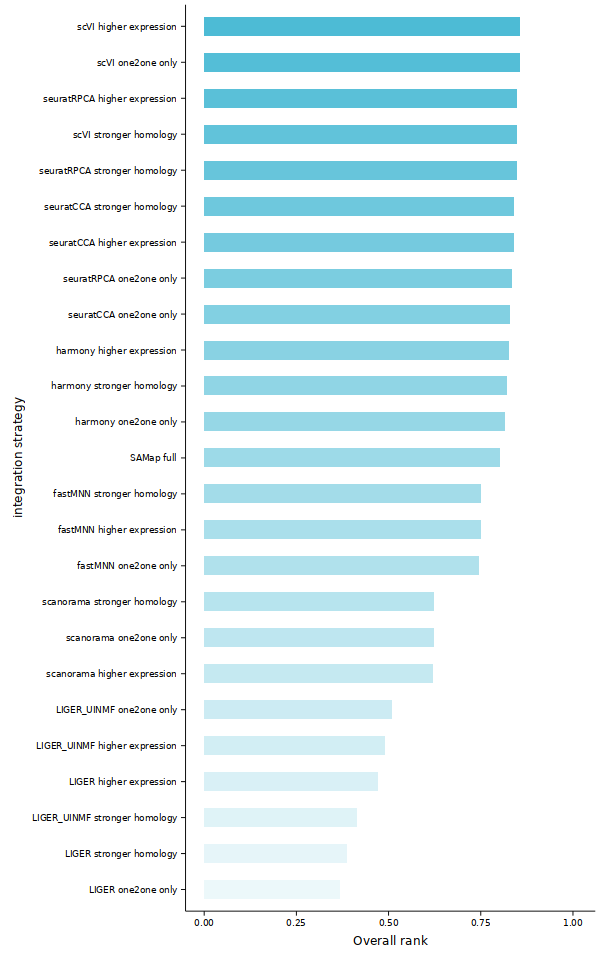

In [115]:
options(repr.plot.width = 5, repr.plot.height = 8)

merged  %>% 
ggplot(aes(x = factor(type, levels = order_type), y = overall_score_cross_task, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x   +
labs(y = 'Overall rank', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) + 
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

overall = merged %>% 
ggplot(aes(x = factor(type, levels = order_type), y = overall_score_cross_task, alpha = ranking)) + 
geom_bar(stat = 'identity',  fill = "#4DBBD5B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Overall score', x = 'integration strategy') +
  scale_alpha(trans = reverse_trans()) +
scale_x_discrete(limits = rev) + theme(panel.background = element_blank(), legend.position = 'none') +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01))

## batch rank

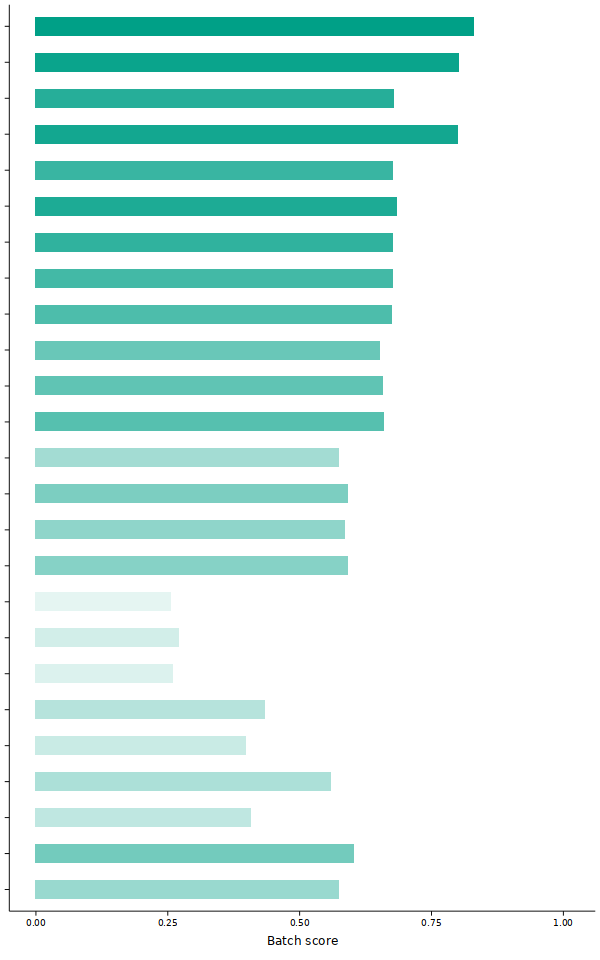

In [116]:
options(repr.plot.width = 5, repr.plot.height = 8)

all_batch_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_score, alpha = cross_task_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [117]:
batch_overall = all_batch_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_score, alpha = cross_task_score_rank)) + 
geom_bar(stat = 'identity',  fill = "#00A087B2", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Batch score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

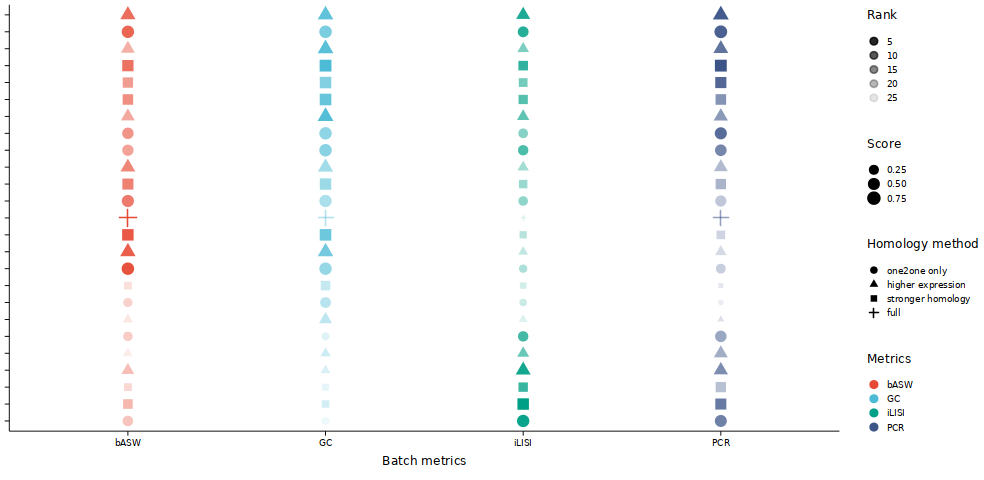

In [134]:
all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
#mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task')) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
#mutate(cross_task_score_rank = dense_rank(desc(cross_task_score))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks')  %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled_cross_task, 
                       ifelse(grepl("graph", Metrics), graph_conn_scaled_cross_task, 
                              ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled_cross_task, 
                                     pcr_scaled_cross_task)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_cross_task_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_cross_task_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_cross_task_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_cross_task_rank", "bASW", Metrics)) %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(0.5, 3)) + labs(y = 'Batch metrics')


In [135]:
batch_detail = all_batch %>% group_by(type) %>% 
mutate(iLISI_scaled_cross_task = mean(c(iLISI_scaled))) %>% 
mutate(graph_conn_scaled_cross_task = mean(c(graph_conn_scaled))) %>% 
mutate(pcr_scaled_cross_task = mean(c(pcr_scaled))) %>% 
mutate(silhouette_batch_scaled_cross_task = mean(c(silhouette_batch_scaled))) %>% 
#mutate(cross_task_score = mean(c(avg_score))) %>% arrange(desc(cross_task_score)) %>%  ## batch overall score is avg four scores
select(type, homology_method, integration_method, ends_with('cross_task')) %>% unique() %>% 
ungroup() %>% 
mutate(iLISI_scaled_cross_task_rank = dense_rank(desc(iLISI_scaled_cross_task)))%>% 
mutate(graph_conn_scaled_cross_task_rank = dense_rank(desc(graph_conn_scaled_cross_task)))%>% 
mutate(pcr_scaled_cross_task_rank = dense_rank(desc(pcr_scaled_cross_task)))%>% 
mutate(silhouette_batch_scaled_cross_task_rank = dense_rank(desc(silhouette_batch_scaled_cross_task))) %>% 
#mutate(cross_task_score_rank = dense_rank(desc(cross_task_score))) %>% 
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'ranks')  %>% 
mutate(scores = ifelse(grepl("iLISI", Metrics), iLISI_scaled_cross_task, 
                       ifelse(grepl("graph", Metrics), graph_conn_scaled_cross_task, 
                              ifelse(grepl("silhoue", Metrics), silhouette_batch_scaled_cross_task, 
                                     pcr_scaled_cross_task)))) %>%
mutate(Metrics = gsub("graph_conn_scaled_cross_task_rank", "GC", Metrics)) %>% 
mutate(Metrics = gsub("iLISI_scaled_cross_task_rank", "iLISI", Metrics)) %>% 
mutate(Metrics = gsub("pcr_scaled_cross_task_rank", "PCR", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_batch_scaled_cross_task_rank", "bASW", Metrics)) %>% 
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = ranks, color = Metrics, size = scores)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank()) + scale_color_npg(name = 'Metrics') + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score',  range = c(0.5, 3)) + labs(y = 'Batch metrics')

## Bio rank

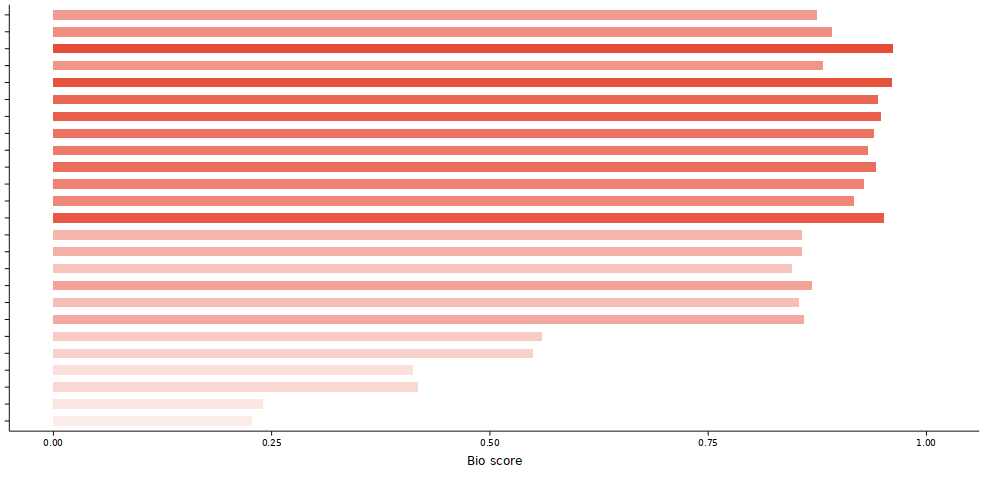

In [136]:

all_bio_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_bio, alpha = cross_task_bio_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [137]:
bio_overall = all_bio_ranked %>% 
ggplot(aes(x = factor(type, levels = order_type), y = cross_task_bio, alpha = cross_task_bio_rank)) + 
geom_bar(stat = 'identity',  fill = "#E64B3599", width = 0.5) + coord_flip() + common_0x  +
labs(y = 'Bio score', x = 'integration strategy') +  scale_alpha(trans = reverse_trans()) +
scale_y_continuous(breaks = c(0, 0.25, 0.5, 0.75, 1), limits = c(0, 1.01)) + 
scale_x_discrete(limits = rev) + 
theme(axis.text.y = element_blank(), axis.title.y = element_blank(), 
      panel.background = element_blank(), legend.position = 'none')

In [138]:
head(all_bio_ranked)

type,homology_method,integration_method,cLISI_scaled_cross_task,silhouette_scaled_cross_task,NMI_scaled_cross_task,ARI_scaled_cross_task,acc_loss_scaled_cross_task,cross_task_bio,traj_scaled,cLISI_scaled_cross_task_rank,silhouette_scaled_cross_task_rank,NMI_scaled_cross_task_rank,ARI_scaled_cross_task_rank,acc_loss_scaled_cross_task_rank,traj_scaled_cross_task_rank,cross_task_bio_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
seuratRPCA higher expression,higher expression,seuratRPCA,0.9537245,0.9040638,0.9380910,0.9055484,0.9861479,0.9606367,0.7190876,4,3,4,4,3,9,1
seuratRPCA stronger homology,stronger homology,seuratRPCA,0.9525072,0.8970926,0.9203195,0.8751432,0.9892232,0.9602605,0.7217988,5,4,5,6,2,8,2
SAMap full,full,SAMap,1.0000000,0.5464092,0.9859807,0.9953493,0.9959316,0.9505016,0.5433187,1,16,1,1,1,22,3
seuratCCA higher expression,higher expression,seuratCCA,0.9570142,0.9701707,0.9390095,0.9183430,0.9643159,0.9468994,0.6887104,3,1,3,3,11,12,4
seuratCCA stronger homology,stronger homology,seuratCCA,0.9593758,0.9691182,0.9396358,0.9380661,0.9637050,0.9442038,0.6223055,2,2,2,2,12,15,5
harmony higher expression,higher expression,harmony,0.9250359,0.7479331,0.8474768,0.7772162,0.9688966,0.9415555,1.0000000,11,8,8,8,8,1,6


In [139]:
all_bio_ranked %>% arrange(traj_scaled_cross_task_rank)

type,homology_method,integration_method,cLISI_scaled_cross_task,silhouette_scaled_cross_task,NMI_scaled_cross_task,ARI_scaled_cross_task,acc_loss_scaled_cross_task,cross_task_bio,traj_scaled,cLISI_scaled_cross_task_rank,silhouette_scaled_cross_task_rank,NMI_scaled_cross_task_rank,ARI_scaled_cross_task_rank,acc_loss_scaled_cross_task_rank,traj_scaled_cross_task_rank,cross_task_bio_rank
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
harmony higher expression,higher expression,harmony,0.9250359,0.7479331,0.8474768,0.7772162,0.9688966,0.9415555,1.0000000,11,8,8,8,8,1,6
scVI higher expression,higher expression,scVI,0.4574895,0.5127856,0.4537710,0.4519145,0.9770675,0.8741445,0.9509171,25,17,19,19,5,2,13
LIGER higher expression,higher expression,LIGER,0.6174218,0.4106841,0.3932044,0.4423098,0.3650274,0.4116086,0.8931420,22,22,20,20,23,3,23
scVI one2one only,one2one only,scVI,0.6879435,0.5115661,0.6403497,0.7106061,0.9646395,0.8914747,0.8094356,20,18,17,14,10,4,11
LIGER stronger homology,stronger homology,LIGER,0.5755467,0.4461780,0.3054585,0.3051232,0.1578159,0.2397735,0.7959254,23,20,23,21,24,5,24
scVI stronger homology,stronger homology,scVI,0.5596891,0.5022650,0.5197206,0.5703630,0.9776804,0.8803612,0.7899790,24,19,18,18,4,6,12
harmony one2one only,one2one only,harmony,0.9119467,0.7426090,0.8186095,0.7711885,0.9556349,0.9169851,0.7608261,13,9,10,10,14,7,10
seuratRPCA stronger homology,stronger homology,seuratRPCA,0.9525072,0.8970926,0.9203195,0.8751432,0.9892232,0.9602605,0.7217988,5,4,5,6,2,8,2
seuratRPCA higher expression,higher expression,seuratRPCA,0.9537245,0.9040638,0.9380910,0.9055484,0.9861479,0.9606367,0.7190876,4,3,4,4,3,9,1


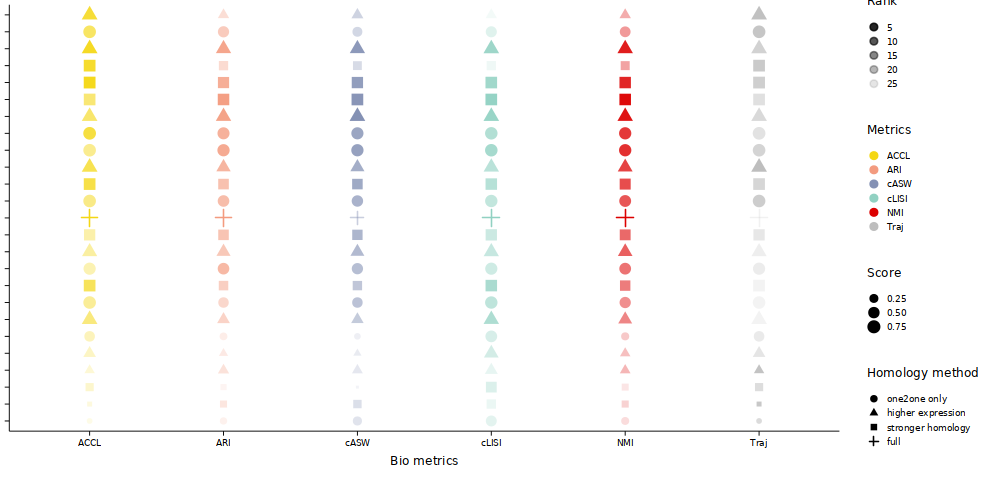

In [140]:
all_bio_ranked %>% select(-cross_task_bio_rank) %>% ungroup() %>%  
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled_cross_task, 
                      ifelse(grepl("NMI", Metrics), NMI_scaled_cross_task, 
                             ifelse(grepl("ARI", Metrics), ARI_scaled_cross_task, 
                                    ifelse(grepl("silhouette", Metrics), silhouette_scaled_cross_task, 
                                           acc_loss_scaled_cross_task))))) %>%
mutate(Metrics = gsub("cLISI_scaled_cross_task_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_cross_task_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_cross_task_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_cross_task_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_cross_task_rank", "ACCL", Metrics)) %>%
mutate(Metrics = gsub("traj_scaled_cross_task_rank", "Traj", Metrics)) %>%
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(0.5, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", 'gray'))

In [141]:
bio_detail = all_bio_ranked %>% select(-cross_task_bio_rank) %>% ungroup() %>%  
pivot_longer(cols = (ends_with('rank')), names_to = 'Metrics', values_to = 'Rank') %>% 
mutate(Score = ifelse(grepl("cLISI", Metrics), cLISI_scaled_cross_task, 
                      ifelse(grepl("NMI", Metrics), NMI_scaled_cross_task, 
                             ifelse(grepl("ARI", Metrics), ARI_scaled_cross_task, 
                                    ifelse(grepl("silhouette", Metrics), silhouette_scaled_cross_task, 
                                           acc_loss_scaled_cross_task))))) %>%
mutate(Metrics = gsub("cLISI_scaled_cross_task_rank", "cLISI", Metrics)) %>% 
mutate(Metrics = gsub("silhouette_scaled_cross_task_rank", "cASW", Metrics)) %>% 
mutate(Metrics = gsub("ARI_scaled_cross_task_rank", "ARI", Metrics)) %>% 
mutate(Metrics = gsub("NMI_scaled_cross_task_rank", "NMI", Metrics)) %>% 
mutate(Metrics = gsub("acc_loss_scaled_cross_task_rank", "ACCL", Metrics)) %>%
mutate(Metrics = gsub("traj_scaled_cross_task_rank", "Traj", Metrics)) %>%
mutate(homology_method = factor(homology_method, levels = c("one2one only", 'higher expression', 'stronger homology', 'full'))) %>%
ggplot(aes(x = factor(type, levels = order_type), y = Metrics, alpha = Rank, color = Metrics, size = Score)) + 
geom_point(aes(shape = homology_method)) + coord_flip() + common_0x    +  
theme(axis.text.y = element_blank(), 
      axis.title.y = element_blank(),  
      panel.background = element_blank())  + 
scale_shape_discrete(name = 'Homology method') + 
scale_alpha_continuous(name = 'Rank', trans = reverse_trans()) +
scale_x_discrete(limits = rev) +
scale_size_continuous(name = 'Score', range = c(0.5, 3)) + labs(y = 'Bio metrics') +
scale_color_manual(name = 'Metrics', values = c("#F4D714", "#F39B7FFF", "#8491B4FF", "#91D1C2FF", "#DC0000FF", 'gray'))

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


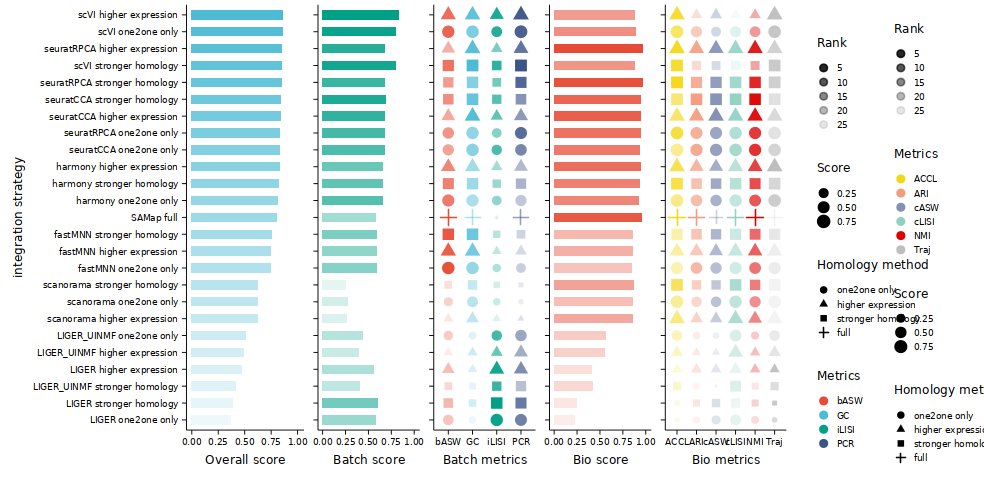

In [142]:
options(repr.plot.width = 8.2, repr.plot.height = 4)

plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))

In [143]:
pdf("all_tasks_summary_metrics.pdf", height  = 4, width = 8.2)


plot_grid(overall, batch_overall,
          batch_detail  + theme(legend.position = 'none'), bio_overall, bio_detail  + theme(legend.position = 'none'), 0.1, 
          get_legend(batch_detail + theme(legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),  
          get_legend(bio_detail + theme(legend.background = element_blank(),
                                        legend.spacing.y = unit(0.1, 'cm'), 
                                          legend.key.size = unit(0.3, "cm"))),
          nrow = 1, rel_widths = c(0.8, 0.3, 0.3, 0.3, 0.35, 0.1, 0.2, 0.2))



dev.off()

Warning message in as_grob.default(plot):
“Cannot convert object of class numeric into a grob.”


png 
  2

In [144]:
all_batch_ranked %>% write_csv("all_tasks_batch_ranked.csv")

In [145]:
all_bio_ranked %>% write_csv("all_tasks_bio_ranked.csv")